In [1]:
# This notebook illustrates the halfar ice model

# Import funman related code
import os
from pathlib import Path
from funman import FunmanResults
import json
from funman import Point, Box, Parameter
from typing import List, Dict
from funman.api.run import Runner

RESOURCES = os.path.join(
   os.getcwd(), "../../resources"
)
EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "halfar")
MODEL_PATH = os.path.join(EXAMPLE_DIR, "halfar.json")
REQUEST_PATH = os.path.join(EXAMPLE_DIR, "halfar_request.json")


def summarize_results(num_disc, results):
   variables = [f"h_{d}" for d in range(num_disc)]
   
   points = results.points()
   boxes = results.parameter_space.boxes()

   print(
      f"{len(points)} Points (+:{len(results.parameter_space.true_points())}, -:{len(results.parameter_space.false_points())}), {len(boxes)} Boxes (+:{len(results.parameter_space.true_boxes)}, -:{len(results.parameter_space.false_boxes)})"
   )
   if points and len(points) > 0:
      point: Point = points[-1]
      parameters: Dict[Parameter, float] = results.point_parameters(point)
      results.plot(variables=variables, label_marker={"true":",", "false": ","},  xlabel="Time", ylabel="Height", legend=variables,label_color={"true": "g", "false":"r"})
      print(f"gamma = {results.parameter_space.points()[0].values['gamma']:.5f}")
      print(parameters)
      print(results.dataframe([point]))
   else:
      # if there are no points, then we have a box that we found without needing points

      box = boxes[0]
      print(json.dumps(box.explain(), indent=4))


# %load_ext autoreload
# %autoreload 2

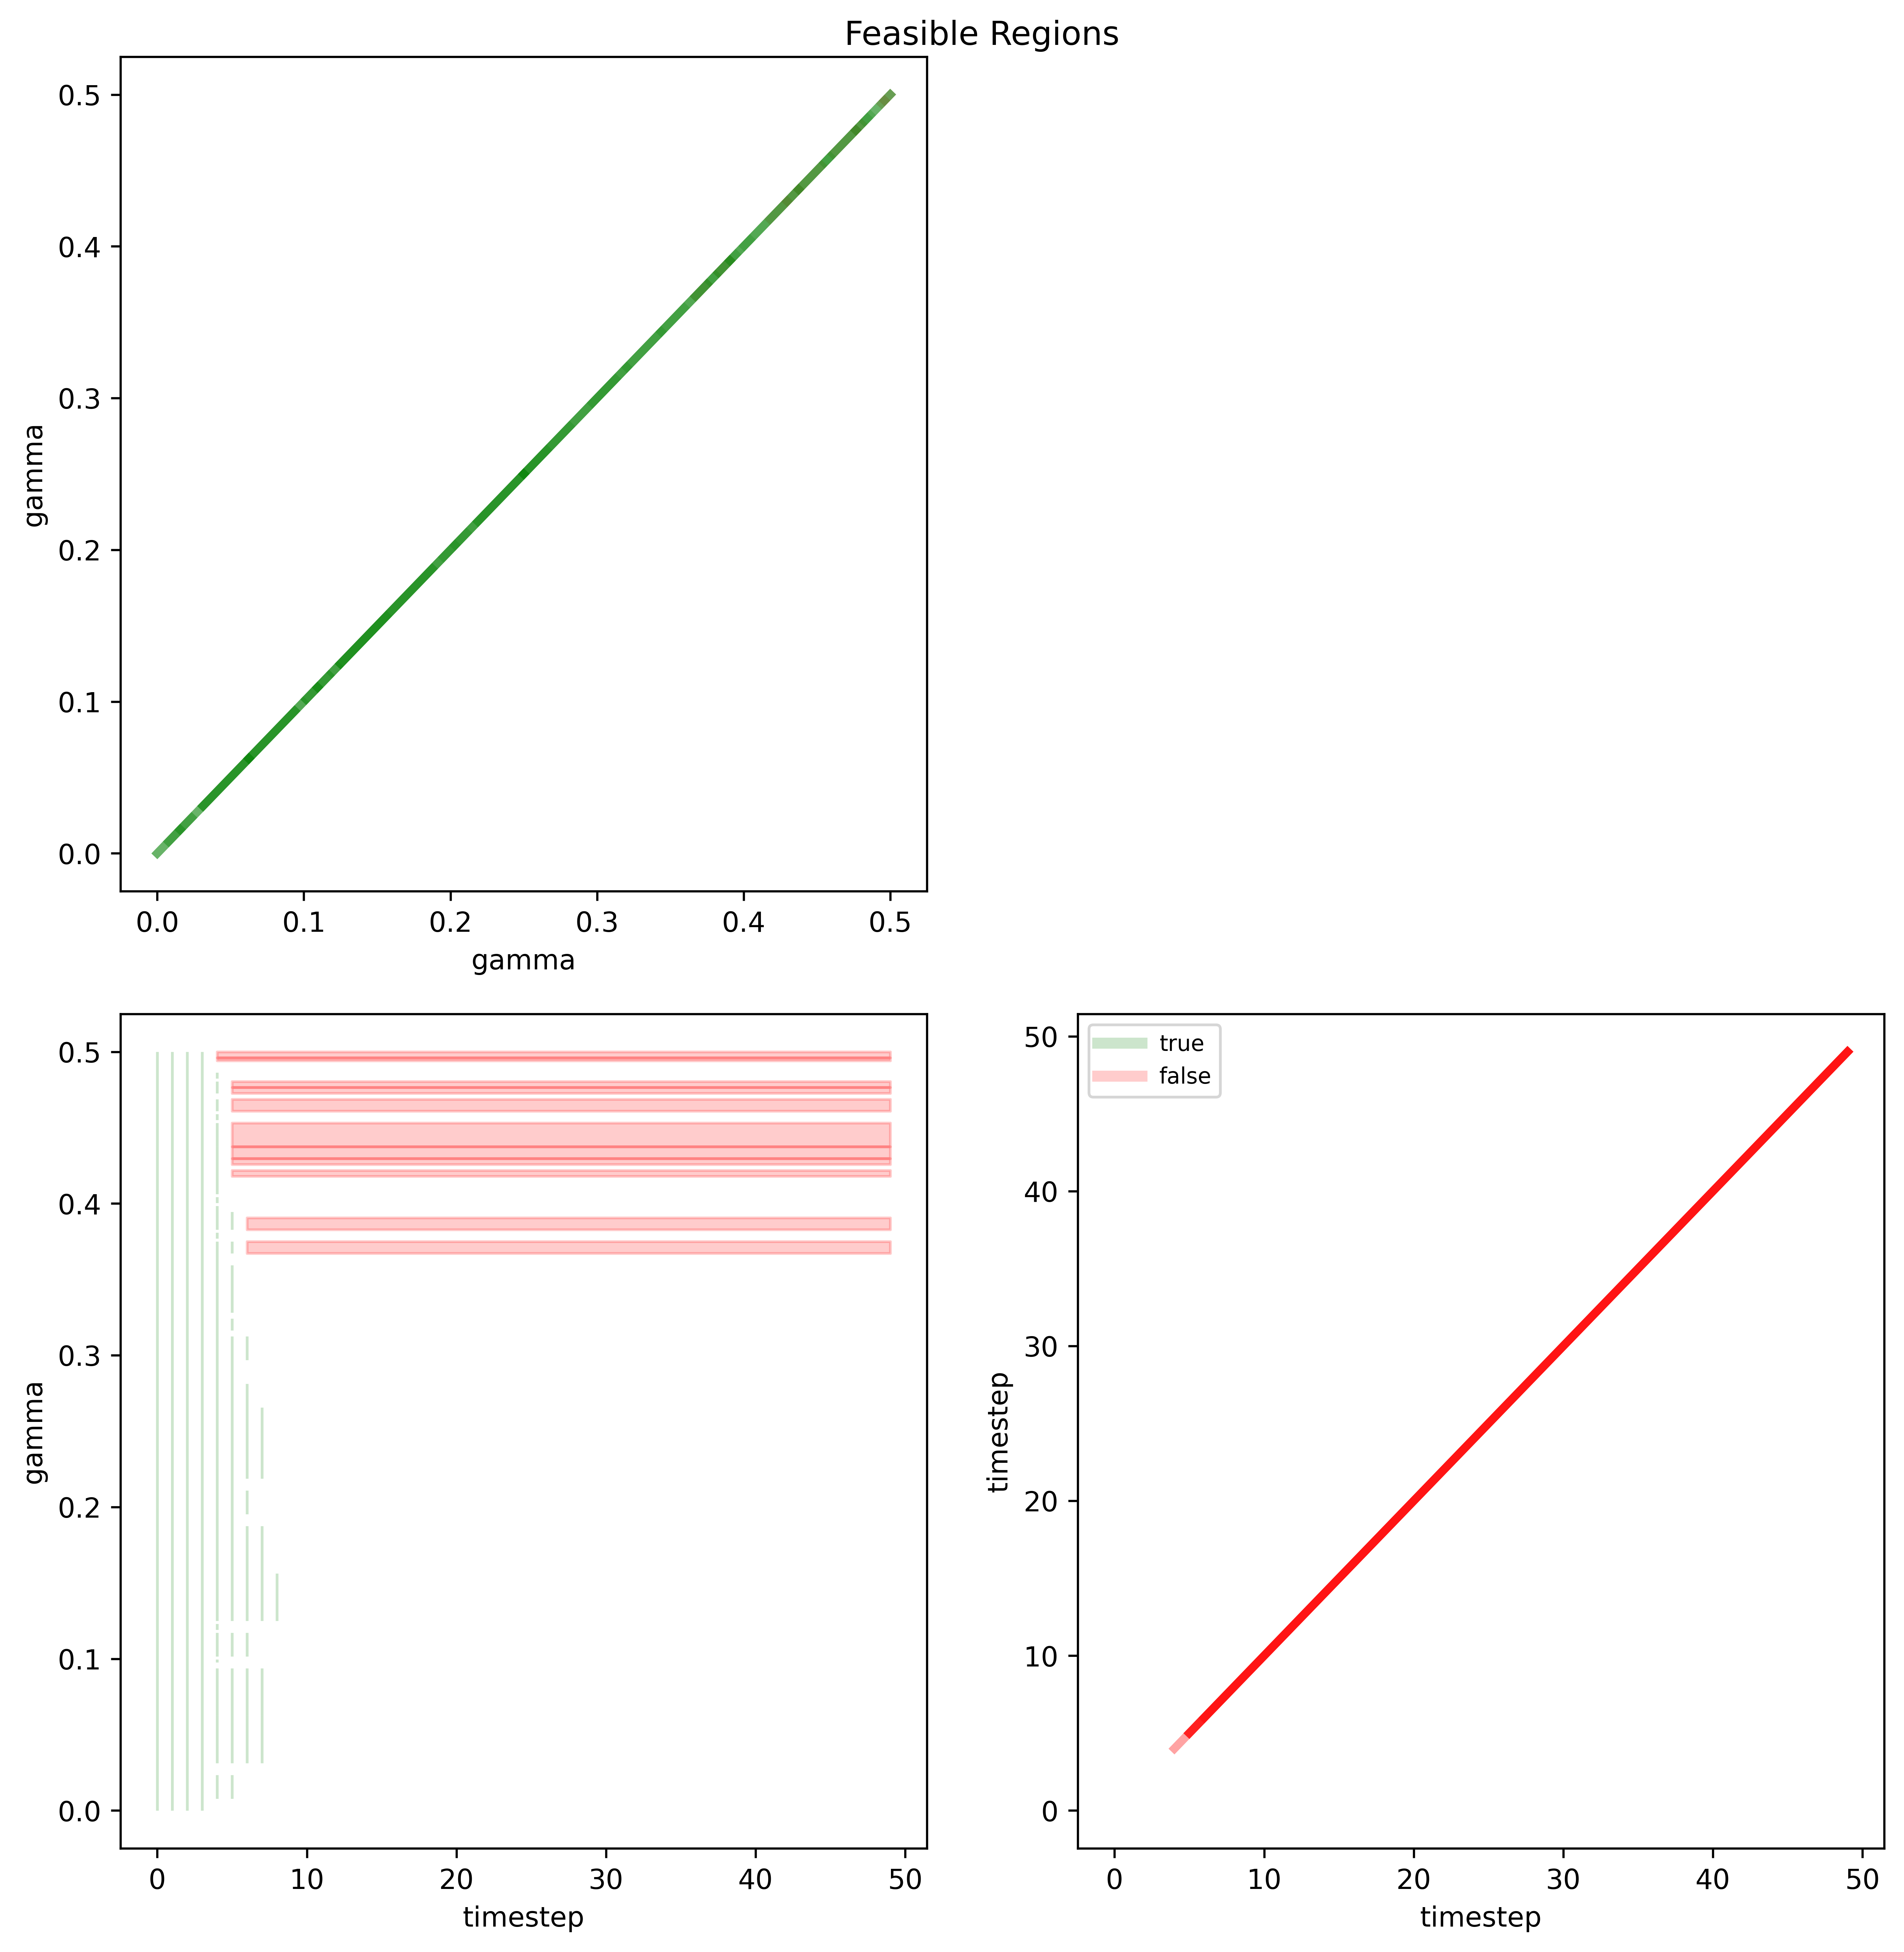

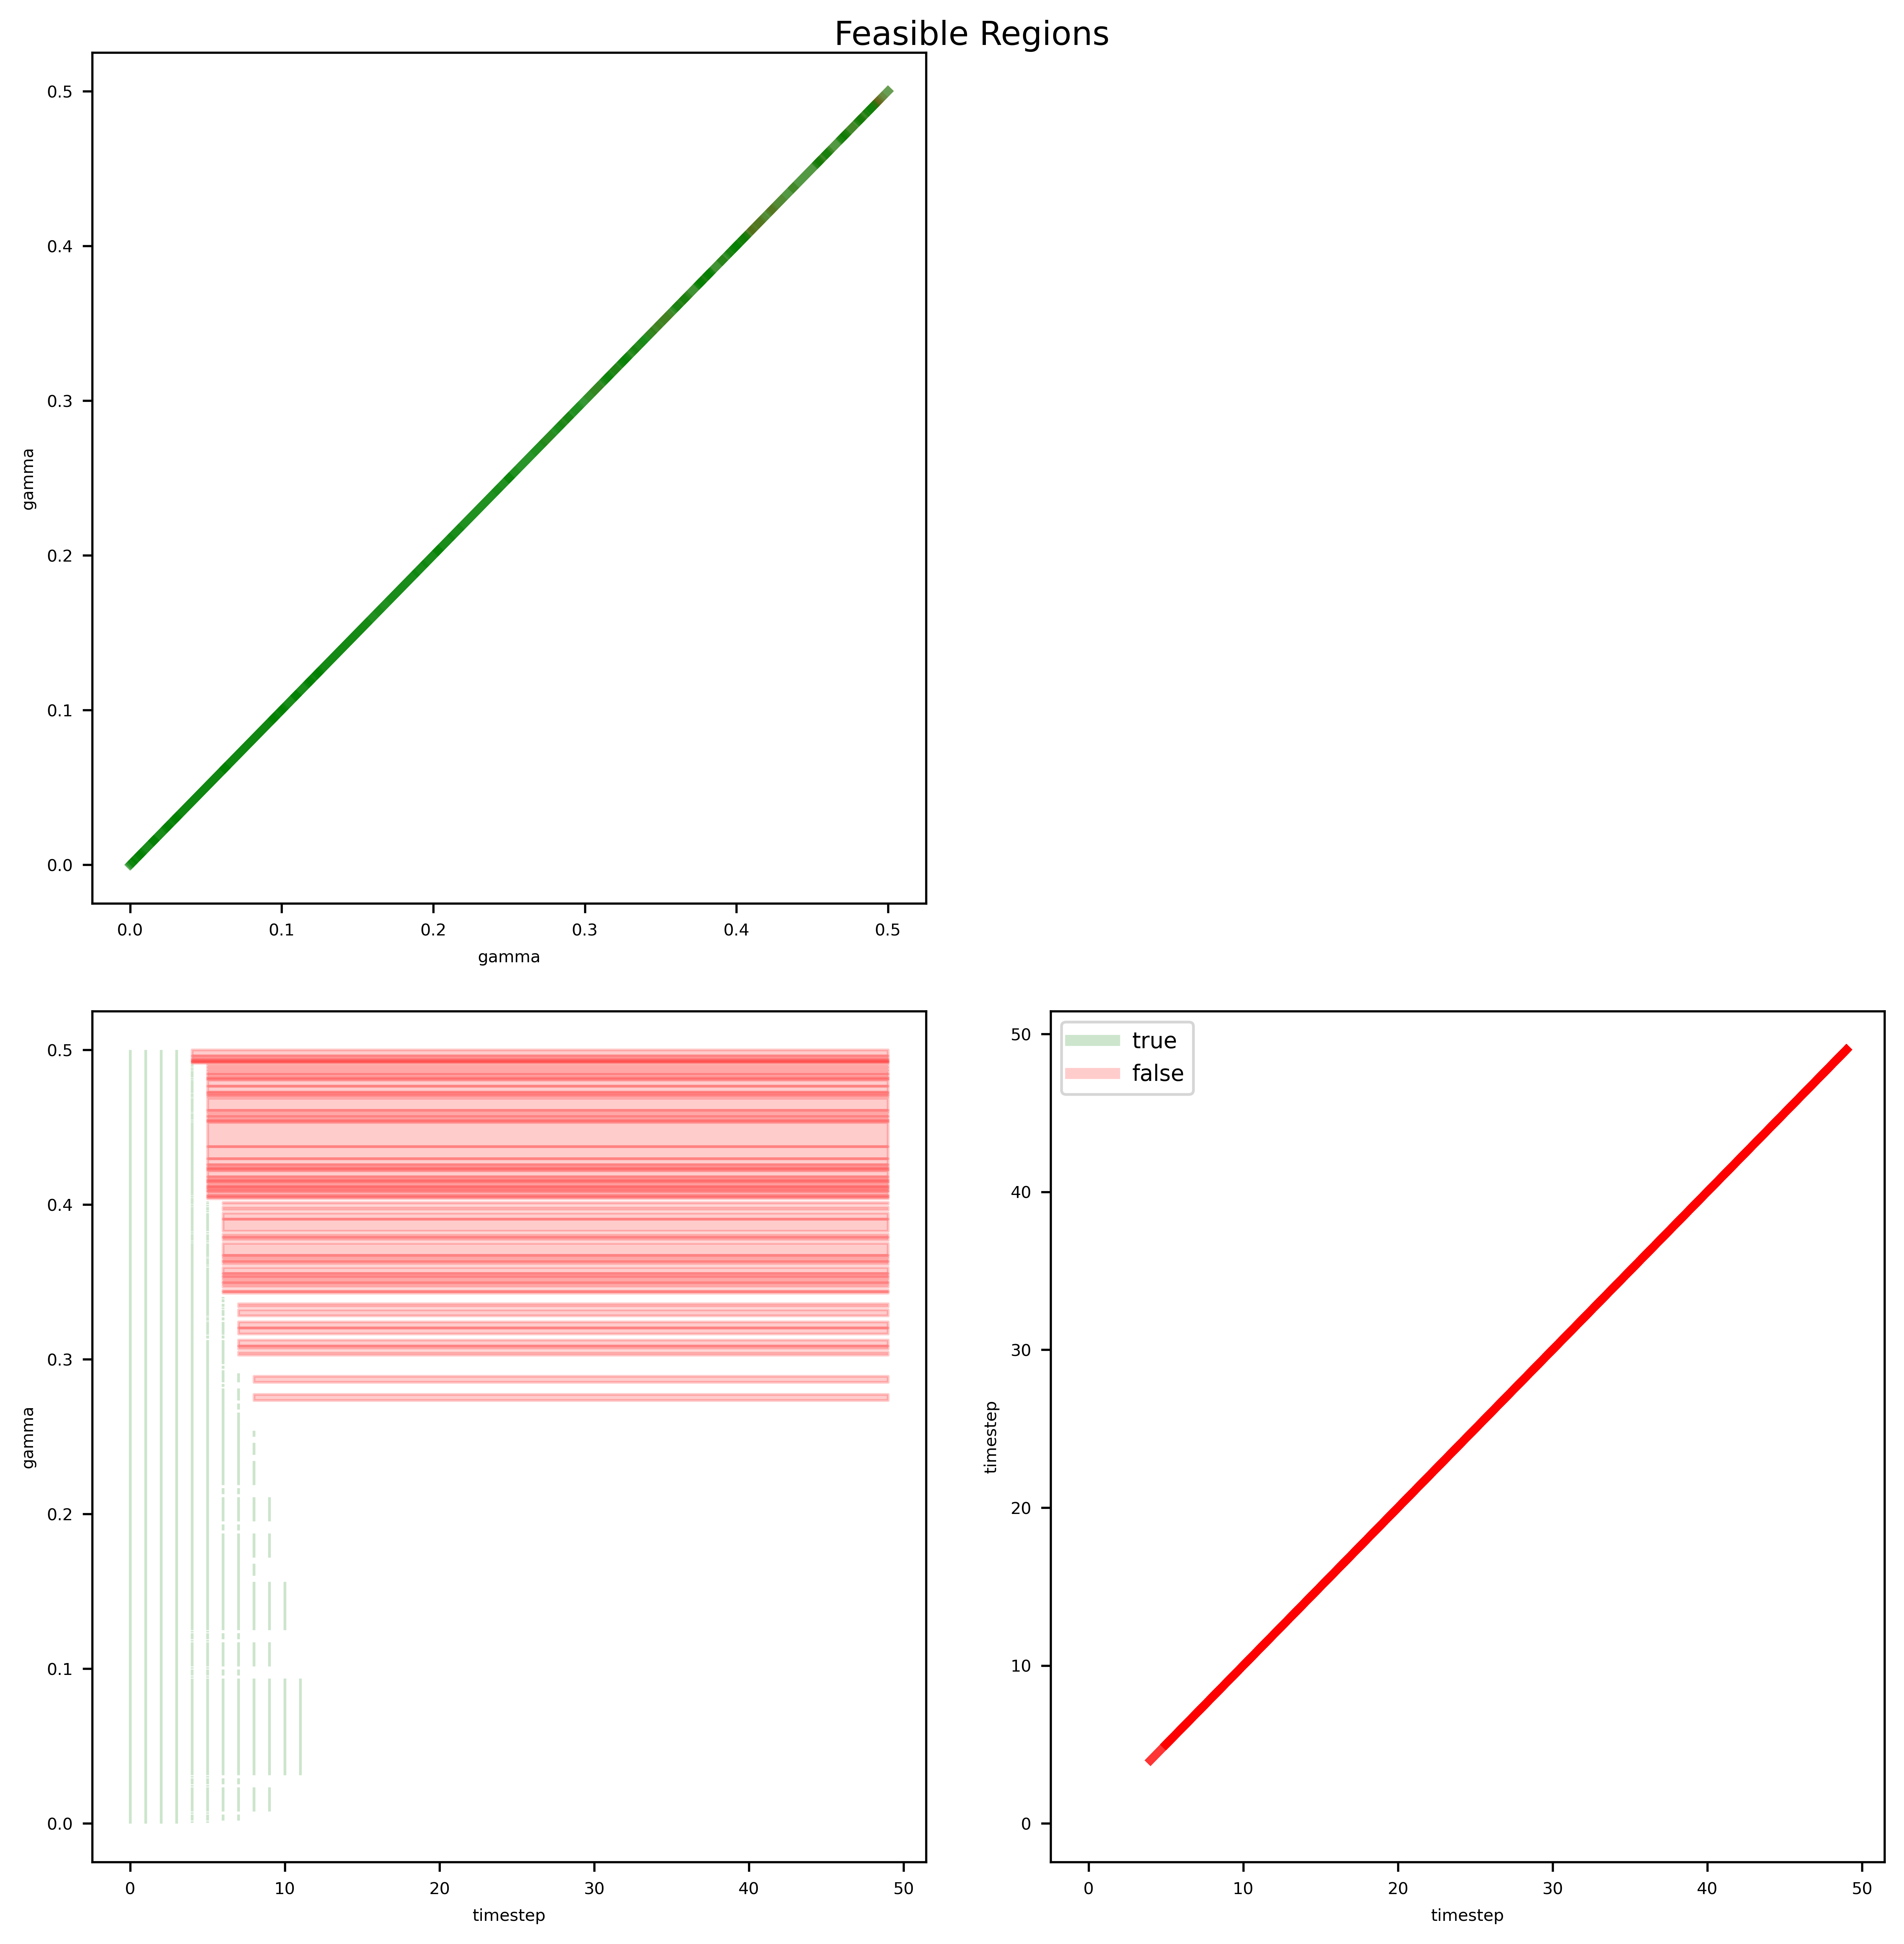

In [2]:
# Use a five point model with no constraints

num_disc = 5
MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 50, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "gamma",
         "label":"all",
         "interval": {"lb":0, "ub":0.5}}
    ],
    "constraints": [
        {"name": "pos_h_0",
         "variable": "h_0",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_1",
         "variable": "h_1",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_2",
         "variable": "h_2",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_3",
         "variable": "h_3",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_4",
         "variable": "h_4",
         "interval": {"lb": 0}
        },
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-5,
        "verbosity": 30,
        "dreal_mcts": True,
        "dreal_precision": 1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}
variables = [f"h_{d}" for d in range(num_disc)]
   
# points = results.points()
# boxes = results.parameter_space.boxes()

# print(
#     f"{len(points)} Points (+:{len(results.parameter_space.true_points())}, -:{len(results.parameter_space.false_points())}), {len(boxes)} Boxes (+:{len(results.parameter_space.true_boxes)}, -:{len(results.parameter_space.false_boxes)})"
# )

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["gamma", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=1
)
# summarize_results(num_disc, results)




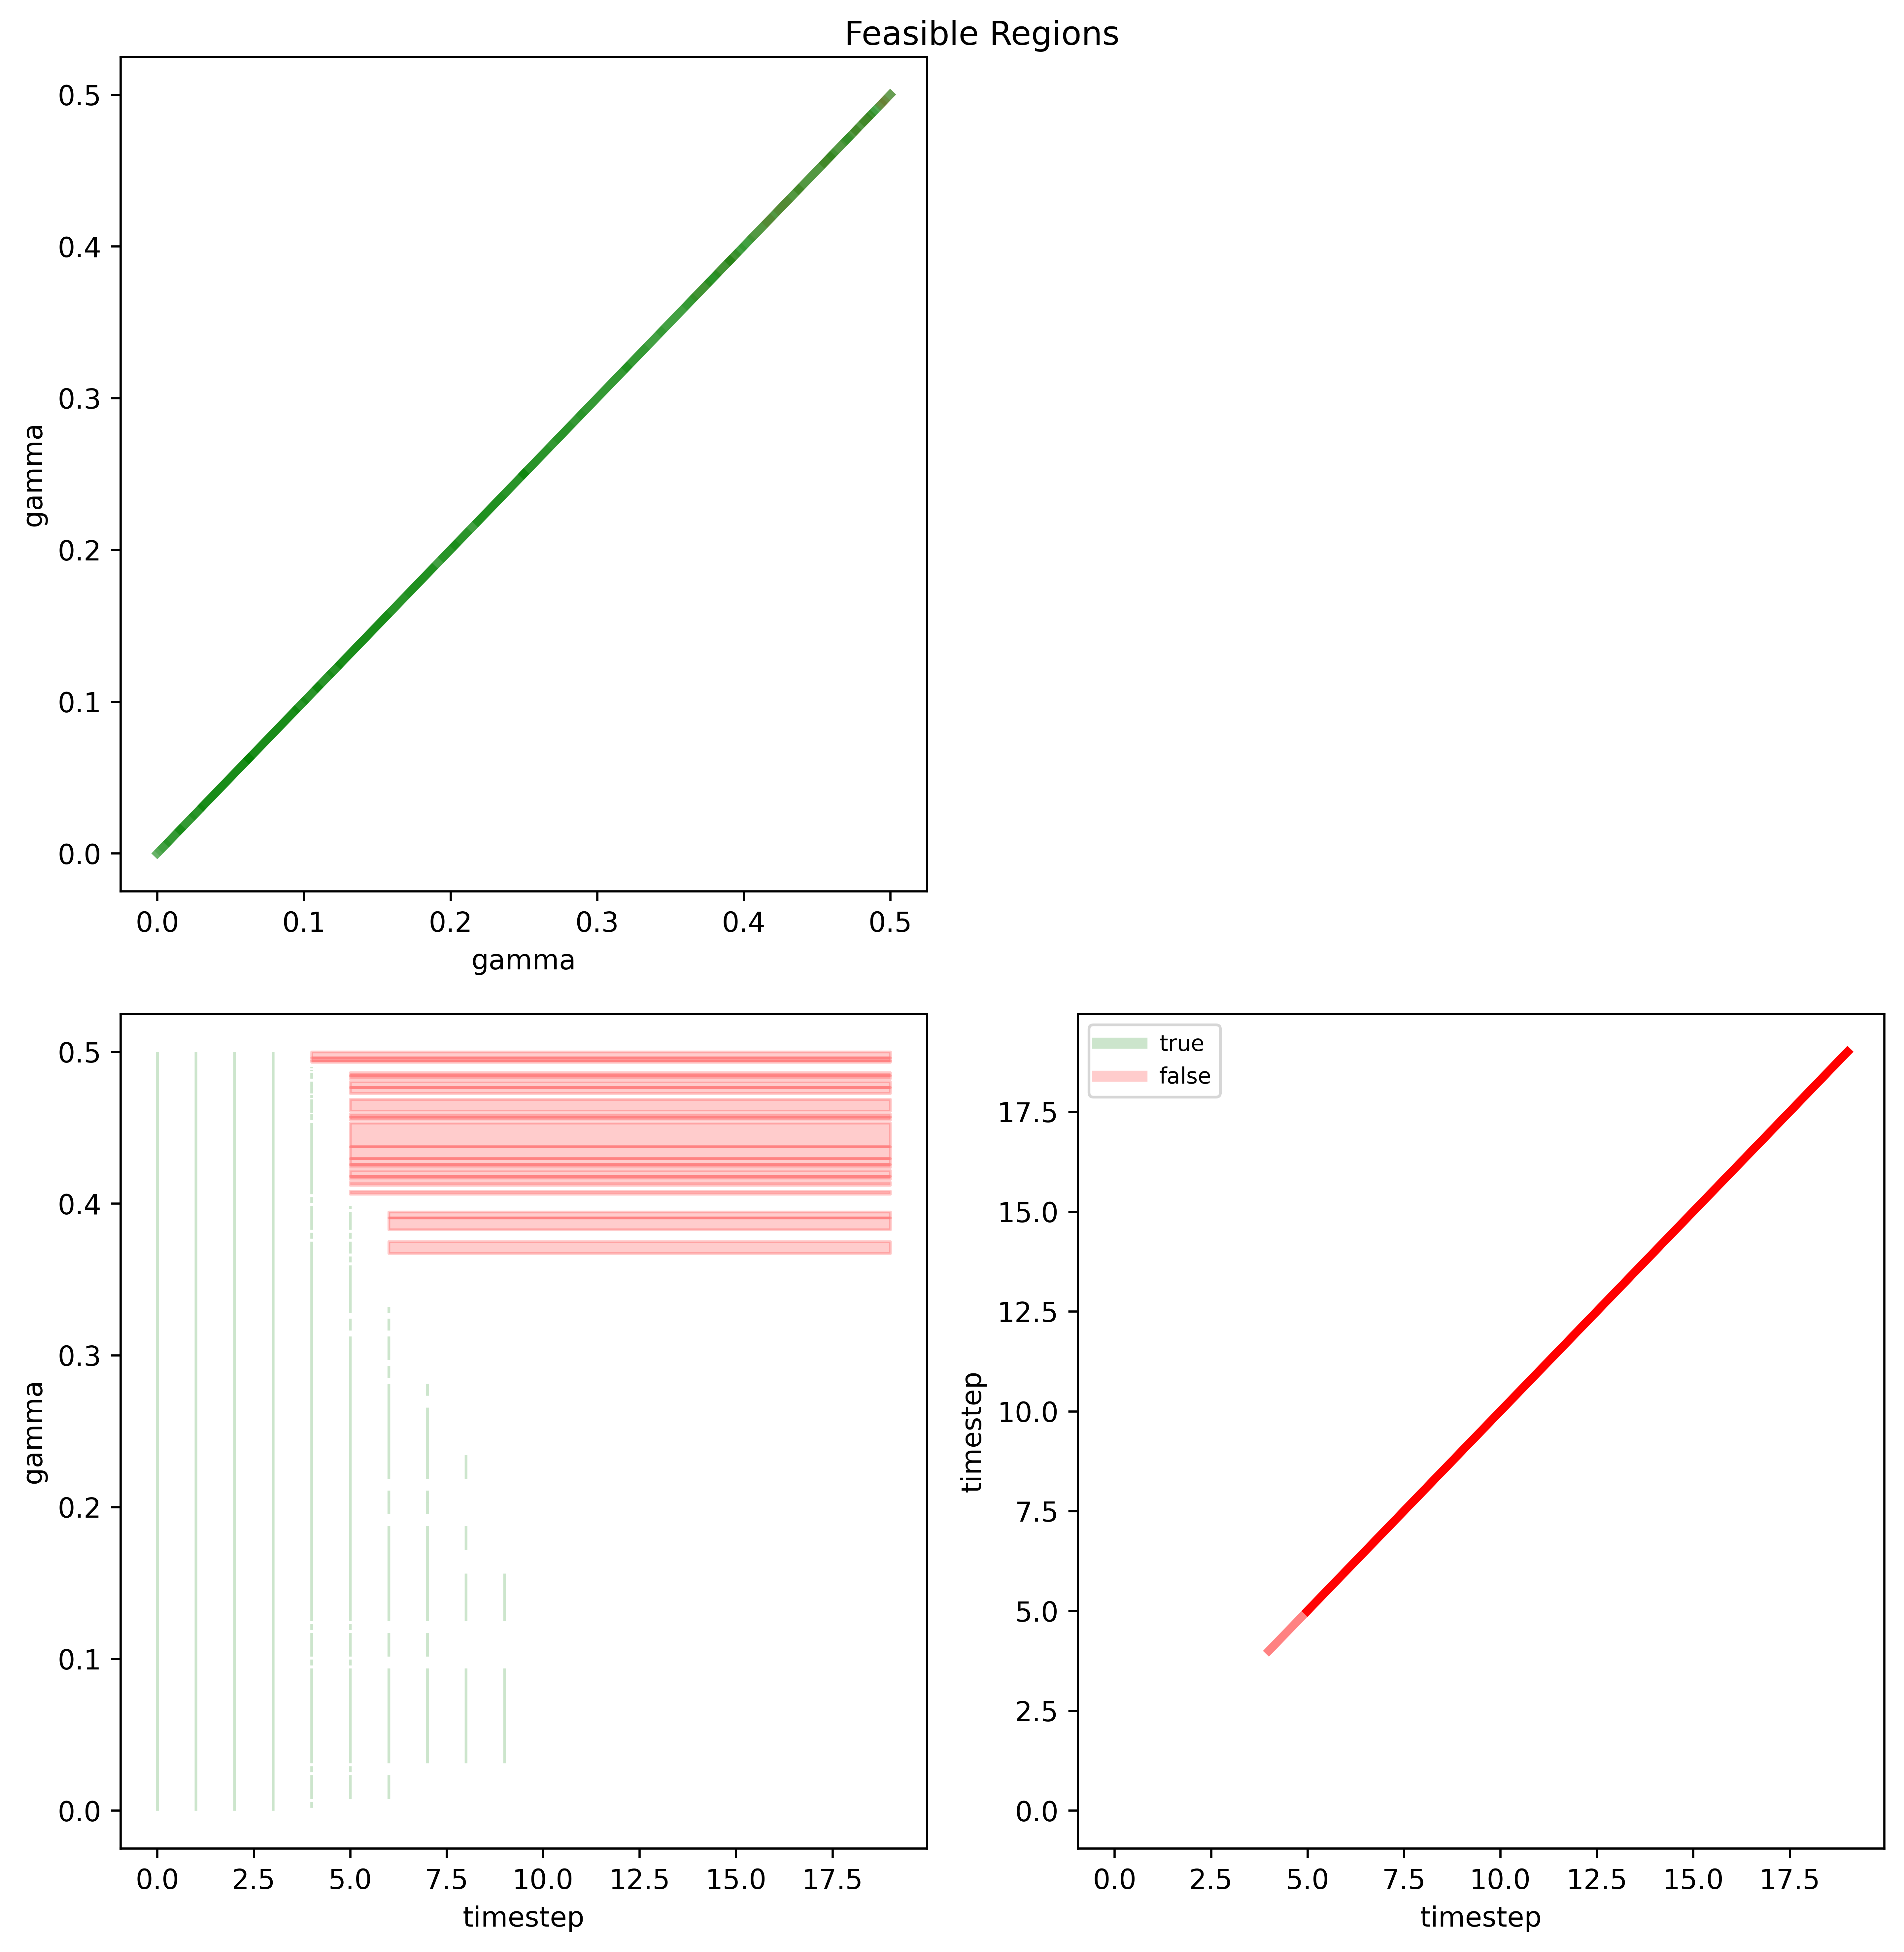

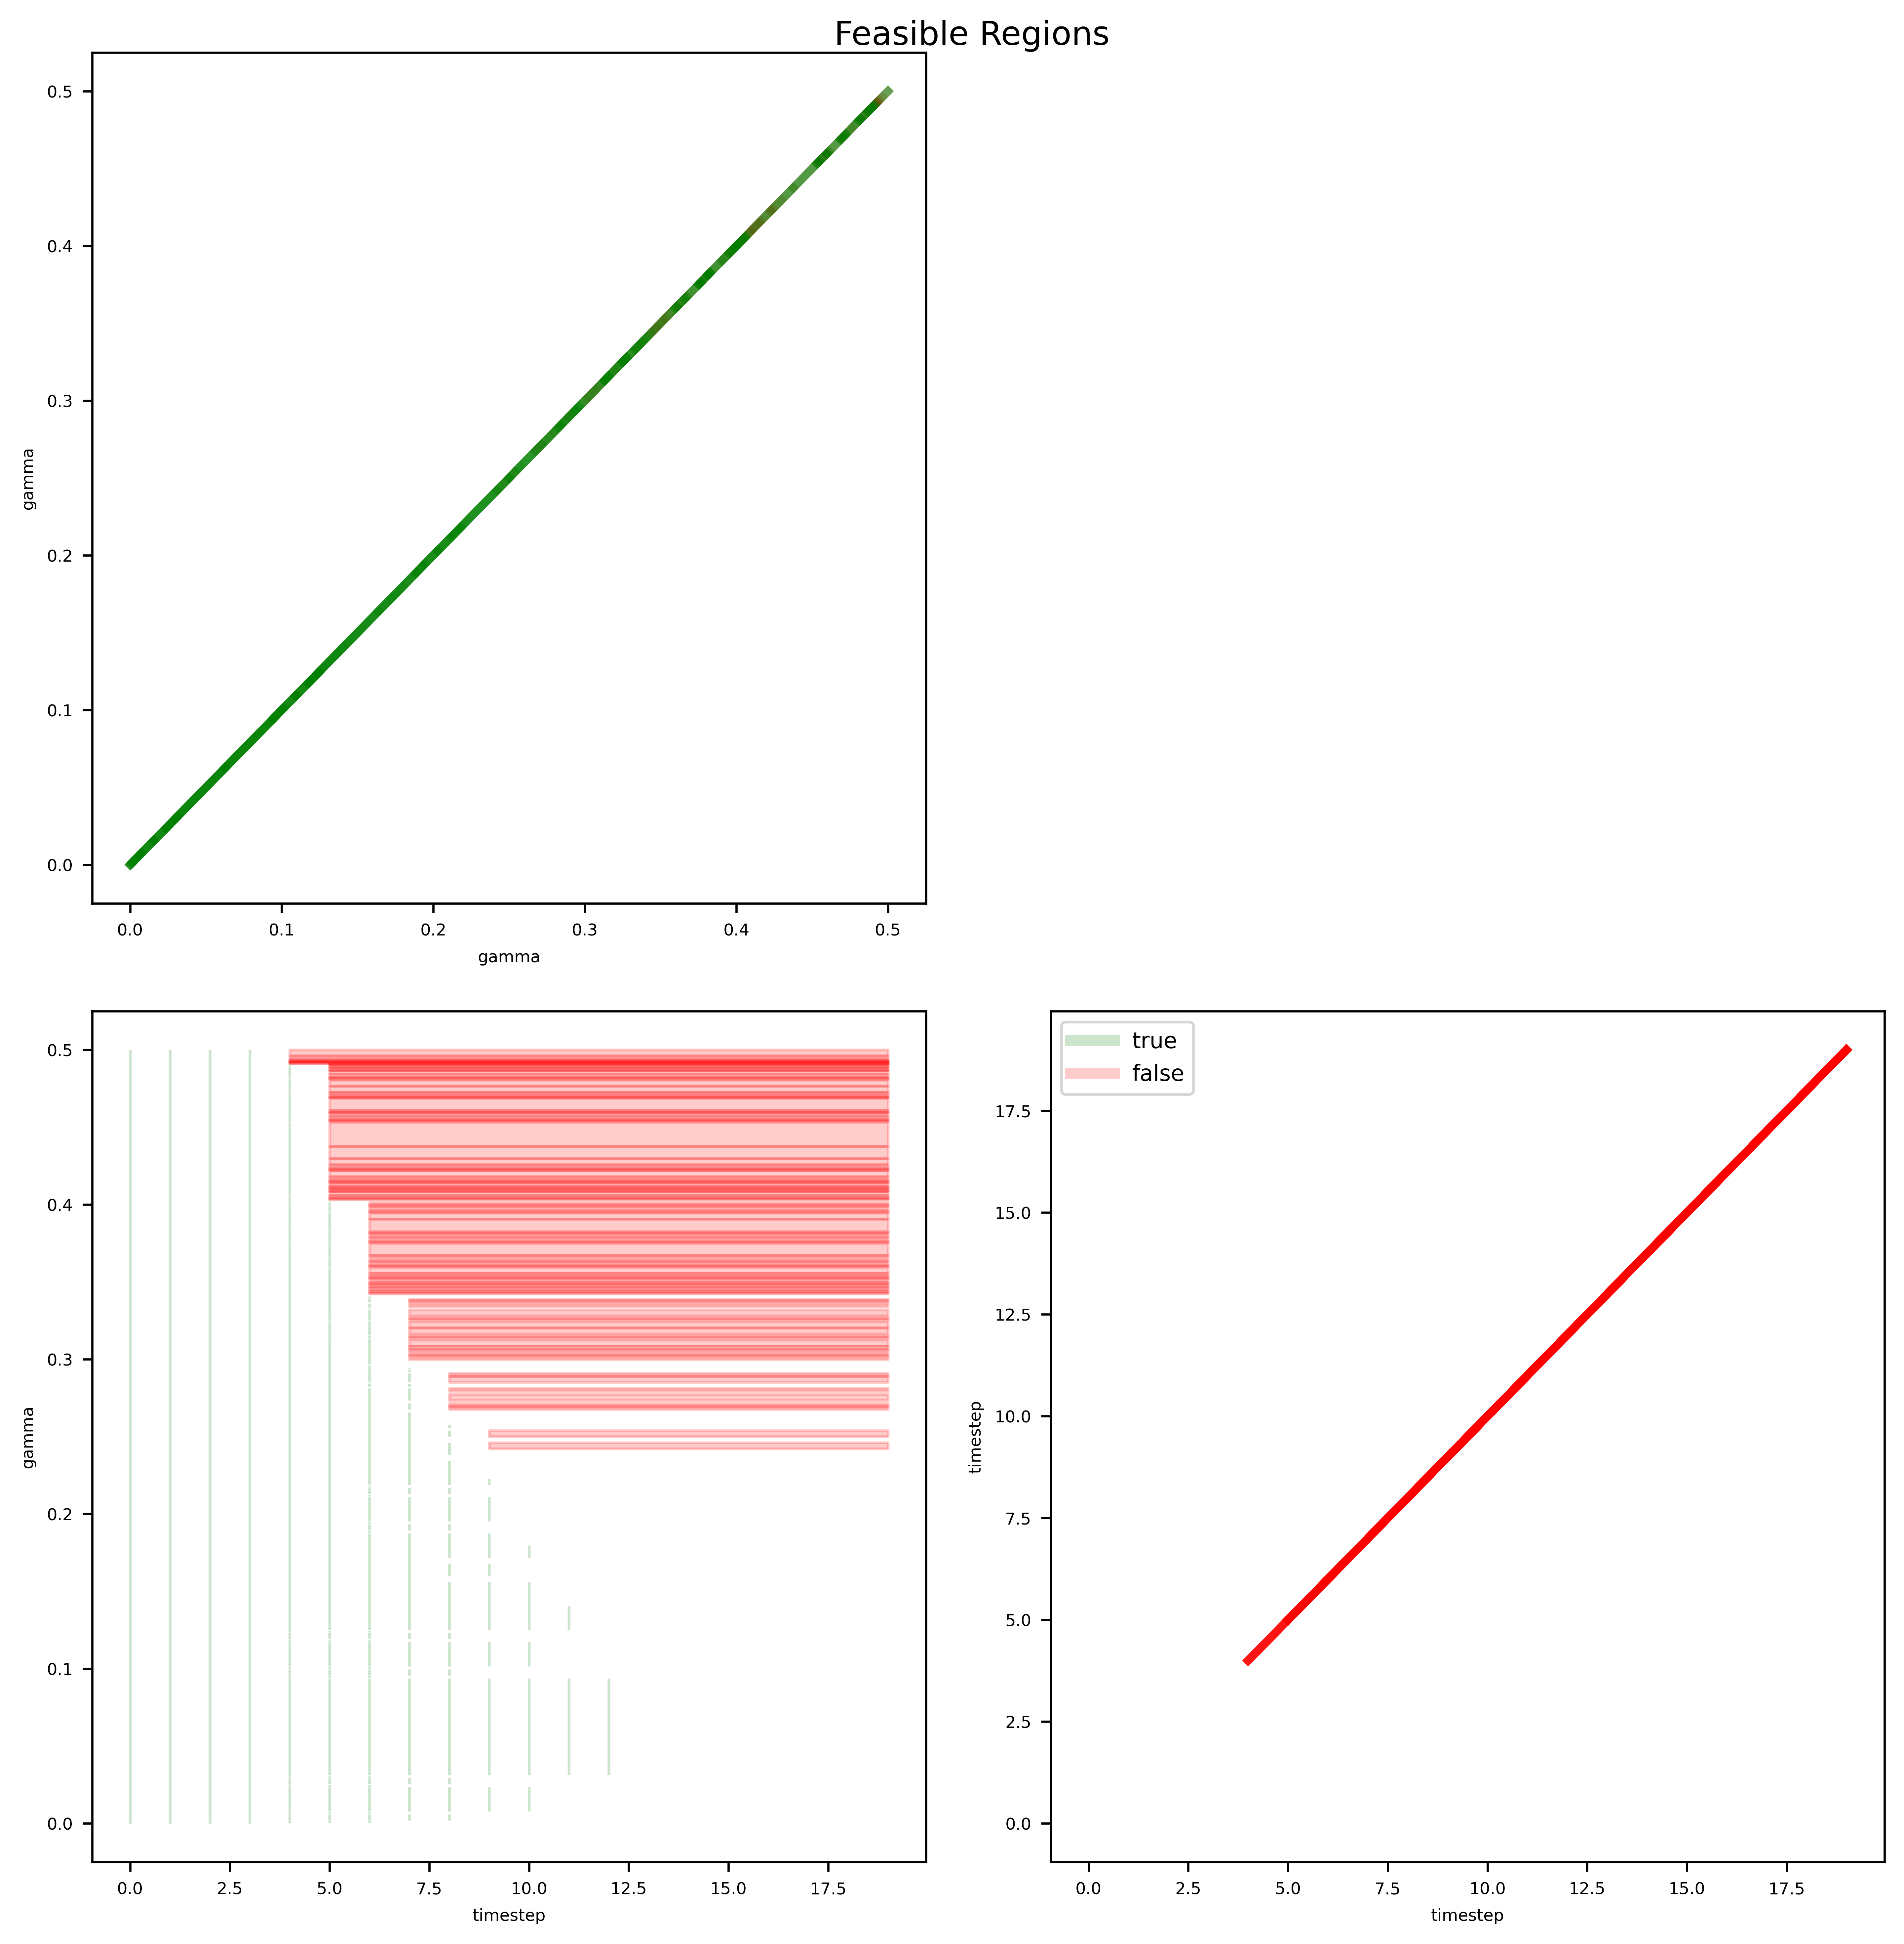

2023-11-03 19:50:53,341 - funman.search.box_search - ERROR - Traceback (most recent call last):
  File "/root/funman/src/funman/search/box_search.py", line 1013, in _expand
    ) = self._get_false_points(
  File "/root/funman/src/funman/search/box_search.py", line 731, in _get_false_points
    points, explanation = self._get_points(
  File "/root/funman/src/funman/search/box_search.py", line 702, in _get_points
    result = self.invoke_solver(solver)
  File "/root/funman/src/funman/search/search.py", line 117, in invoke_solver
    result = s.solve()
  File "/root/funman_venv/lib/python3.8/site-packages/pysmt/decorators.py", line 64, in clear_pending_pop_wrap
    return f(self, *args, **kwargs)
  File "/root/funman/auxiliary_packages/funman_dreal/src/funman_dreal/solver.py", line 626, in solve
    raise e
  File "/root/funman/auxiliary_packages/funman_dreal/src/funman_dreal/solver.py", line 624, in solve
    ans = self.check_sat()
  File "/root/funman/auxiliary_packages/funman_dreal/src

In [2]:
# Use a five point model with no constraints

num_disc = 5
MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 20, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "gamma",
         "label":"all",
         "interval": {"lb":0, "ub":0.5}}
    ],
    "constraints": [
        {"name": "pos_h_0",
         "variable": "h_0",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_1",
         "variable": "h_1",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_2",
         "variable": "h_2",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_3",
         "variable": "h_3",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_4",
         "variable": "h_4",
         "interval": {"lb": 0}
        },
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-5,
        "verbosity": 30,
        "dreal_mcts": True,
        "dreal_precision": 1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}
variables = [f"h_{d}" for d in range(num_disc)]
   
# points = results.points()
# boxes = results.parameter_space.boxes()

# print(
#     f"{len(points)} Points (+:{len(results.parameter_space.true_points())}, -:{len(results.parameter_space.false_points())}), {len(boxes)} Boxes (+:{len(results.parameter_space.true_boxes)}, -:{len(results.parameter_space.false_boxes)})"
# )

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["gamma", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=1
)
# summarize_results(num_disc, results)




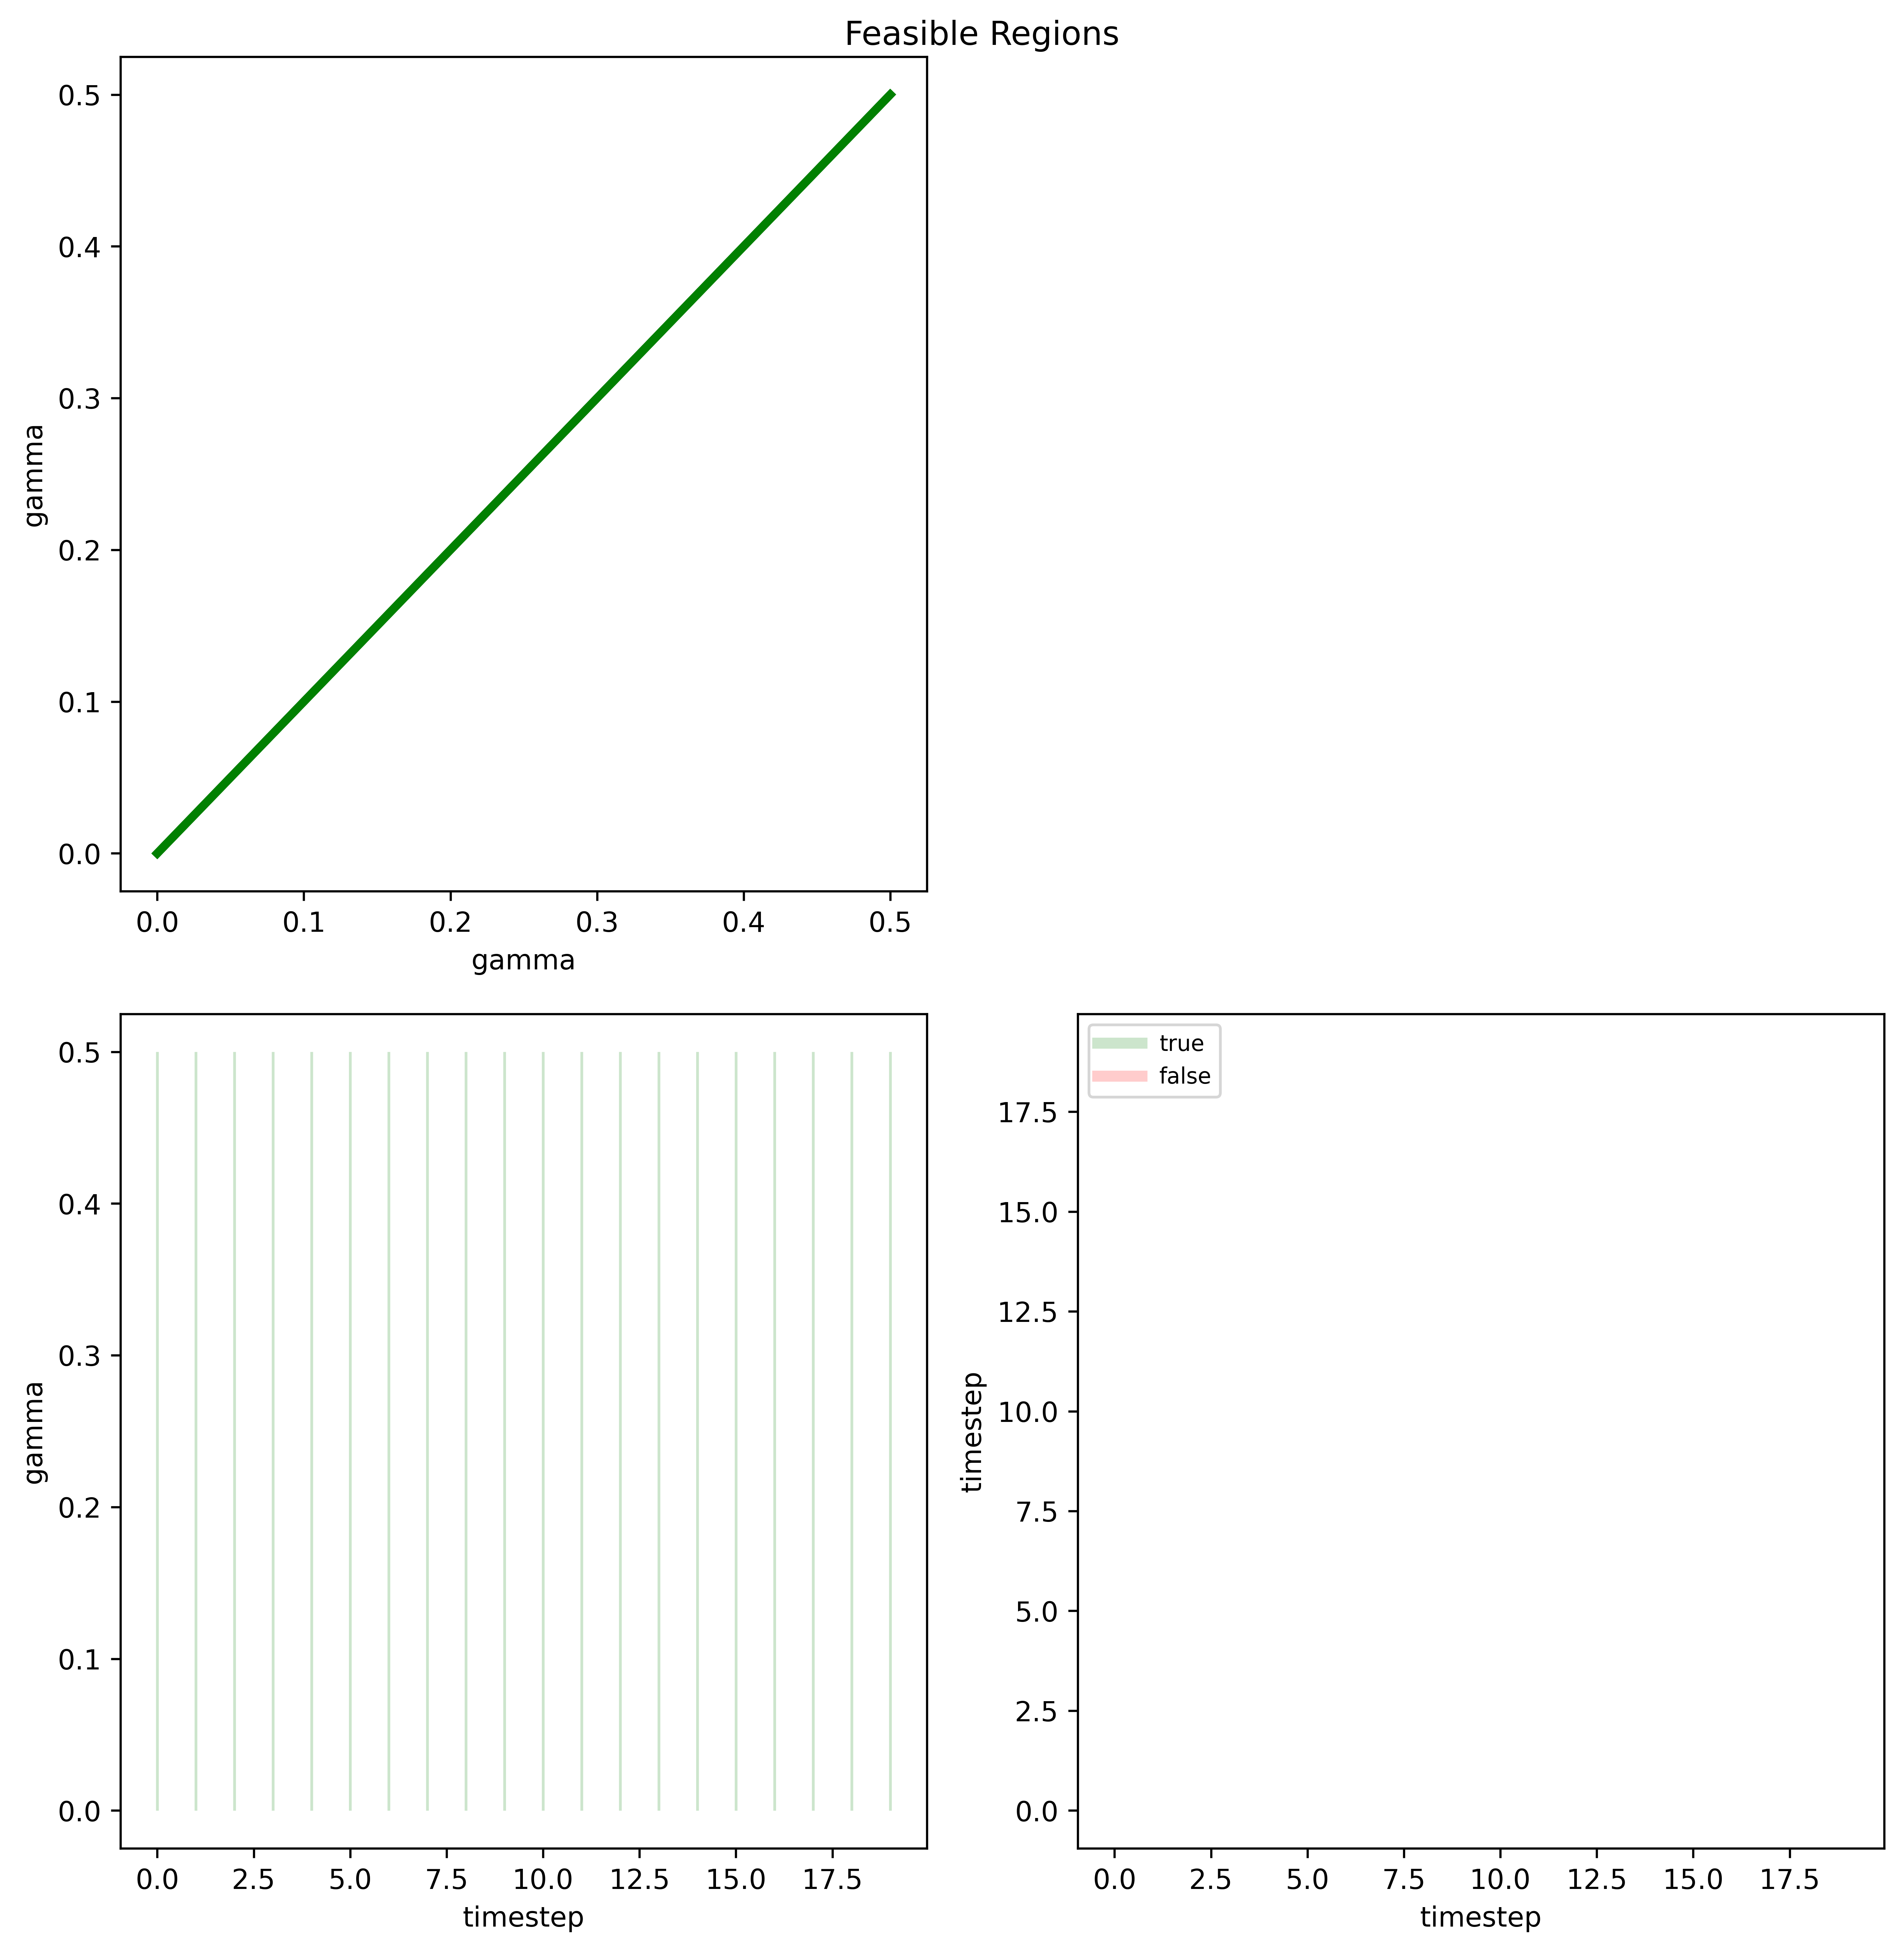

In [2]:
# Use a ten point model with no constraints

num_disc = 10
MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 25, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "gamma",
         "label":"all",
         "interval": {"lb":0, "ub":0.5}}
    ],
    "constraints": [        
        {"name": "pos_h_0",
         "variable": "h_0",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_1",
         "variable": "h_1",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_2",
         "variable": "h_2",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_3",
         "variable": "h_3",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_4",
         "variable": "h_4",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_5",
         "variable": "h_5",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_6",
         "variable": "h_6",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_7",
         "variable": "h_7",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_8",
         "variable": "h_8",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_9",
         "variable": "h_9",
         "interval": {"lb": 0}
        },
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_8", "h_9"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }

        ],
    "config": {
               "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-5,
        "verbosity": 30,
        "dreal_mcts": True,
        "dreal_precision": 1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}
variables = [f"h_{d}" for d in range(num_disc)]
# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["gamma", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=1
)

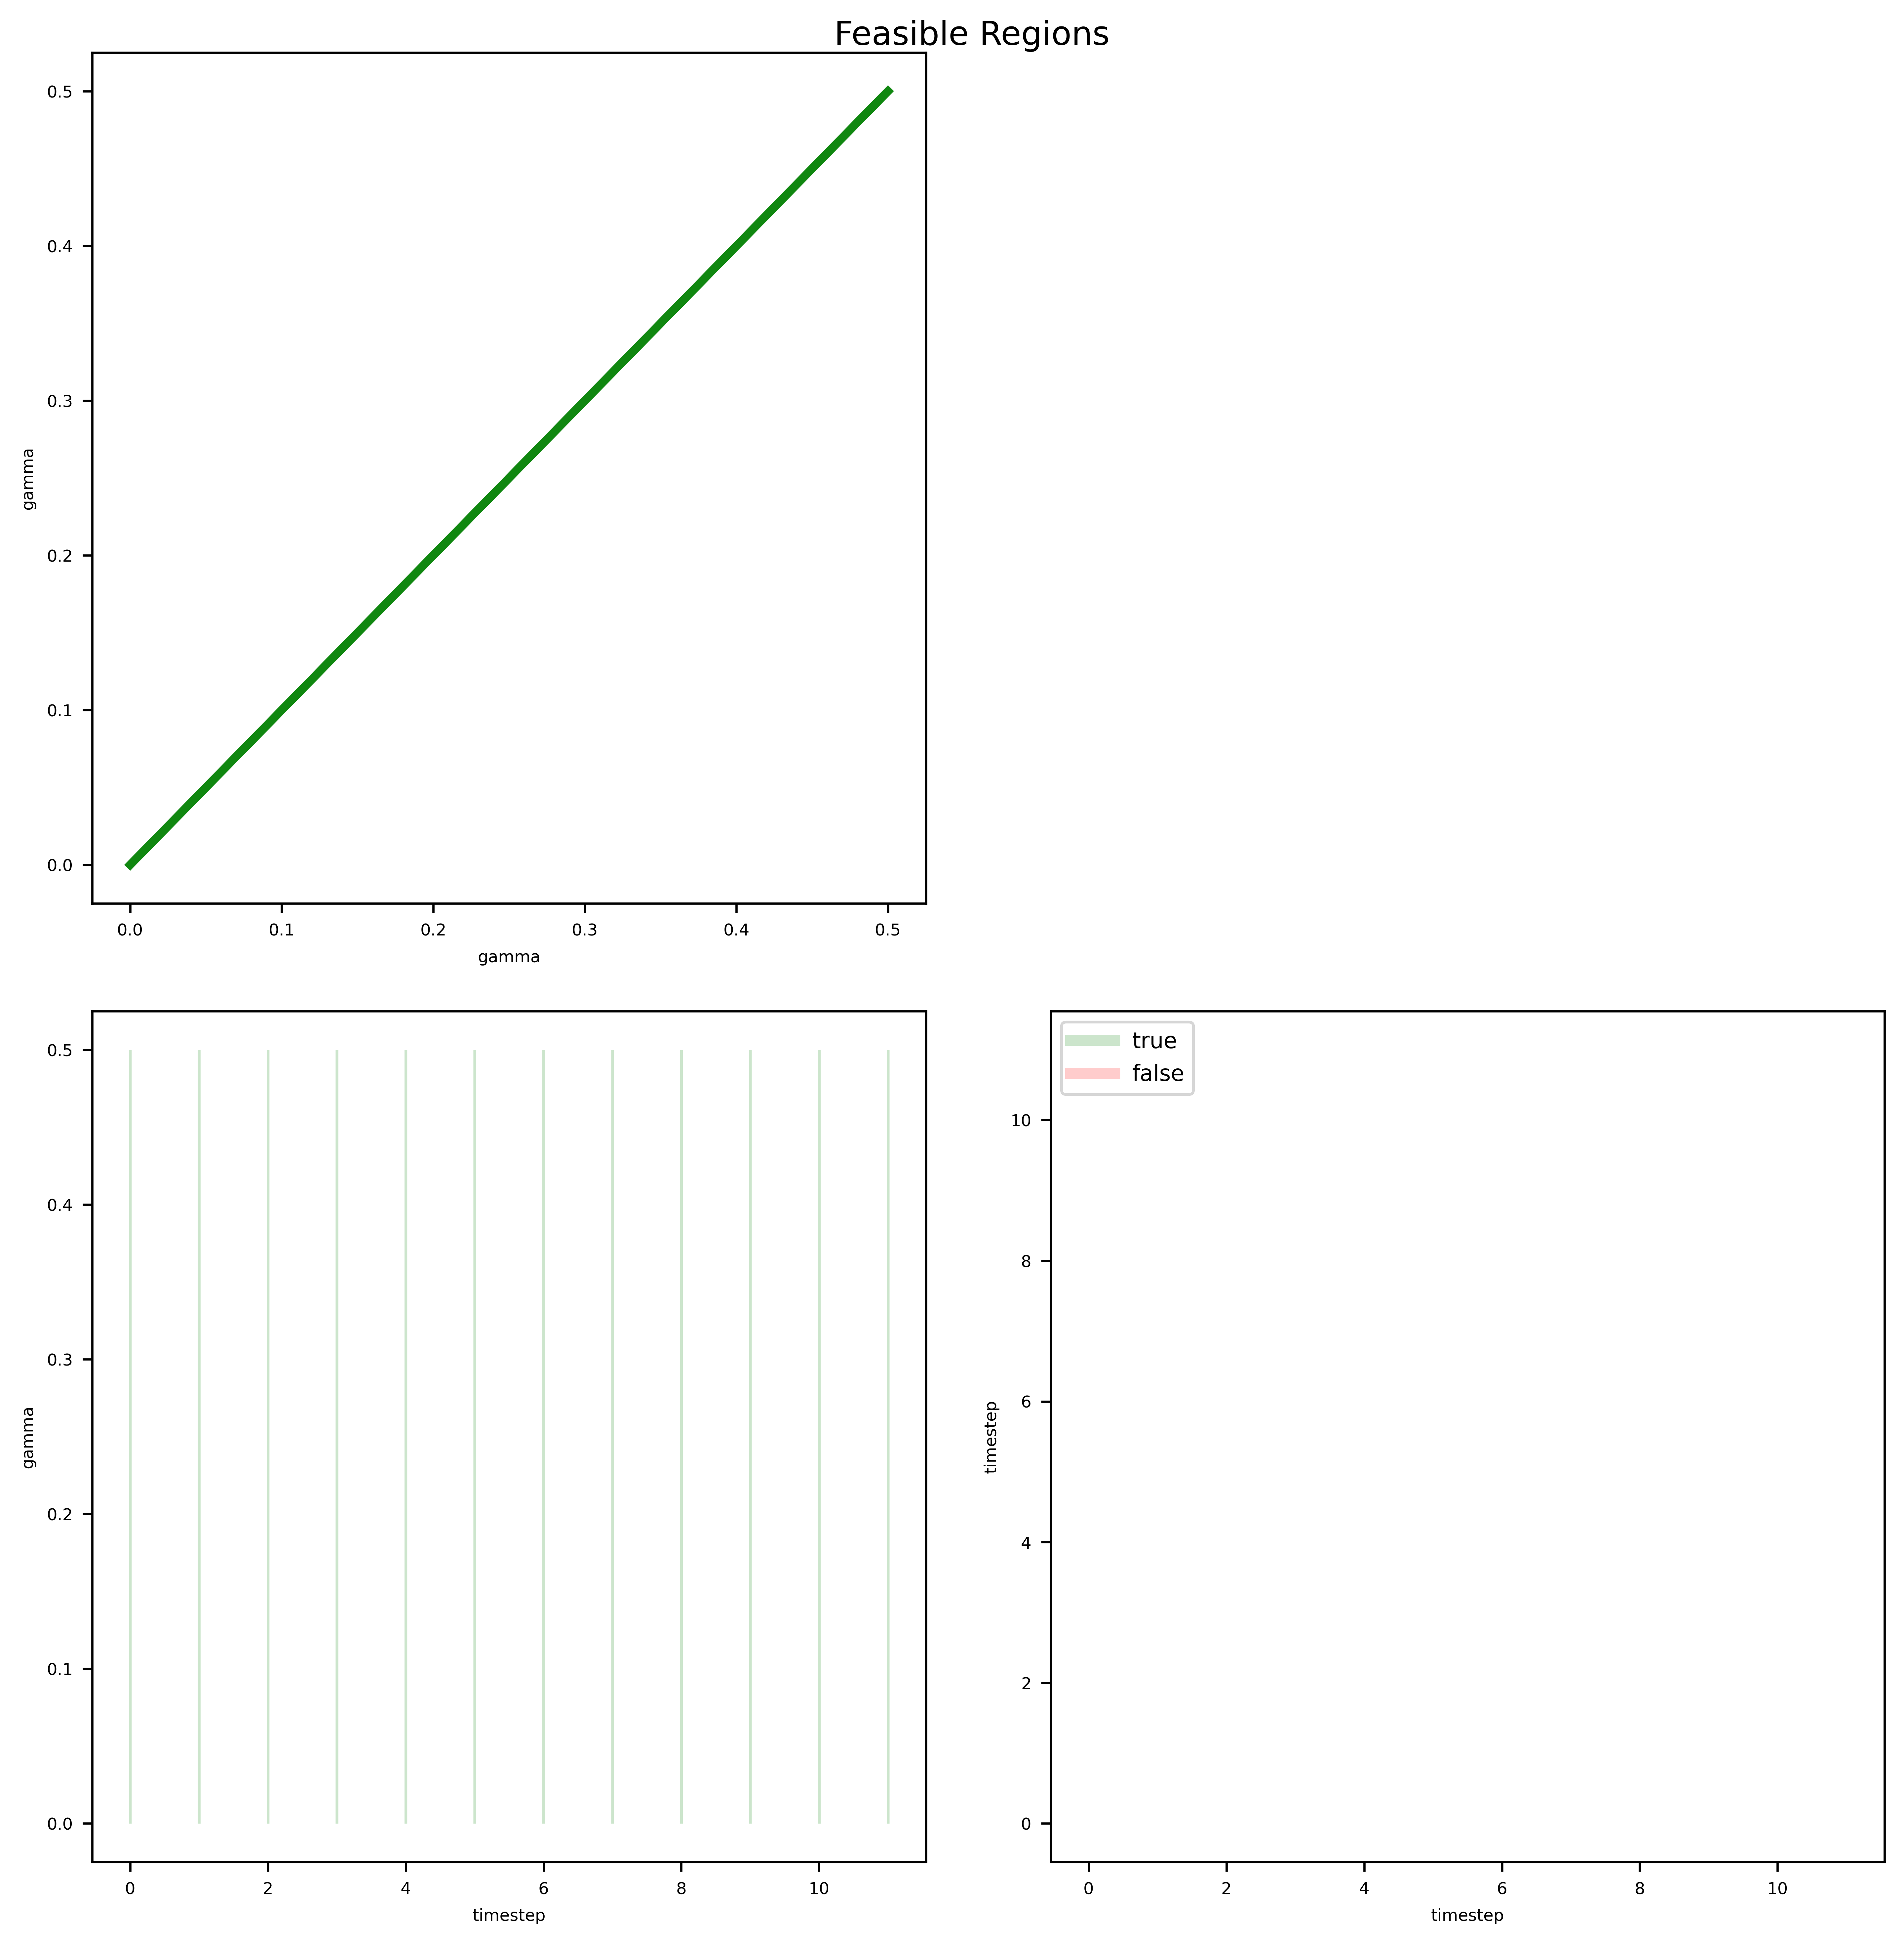

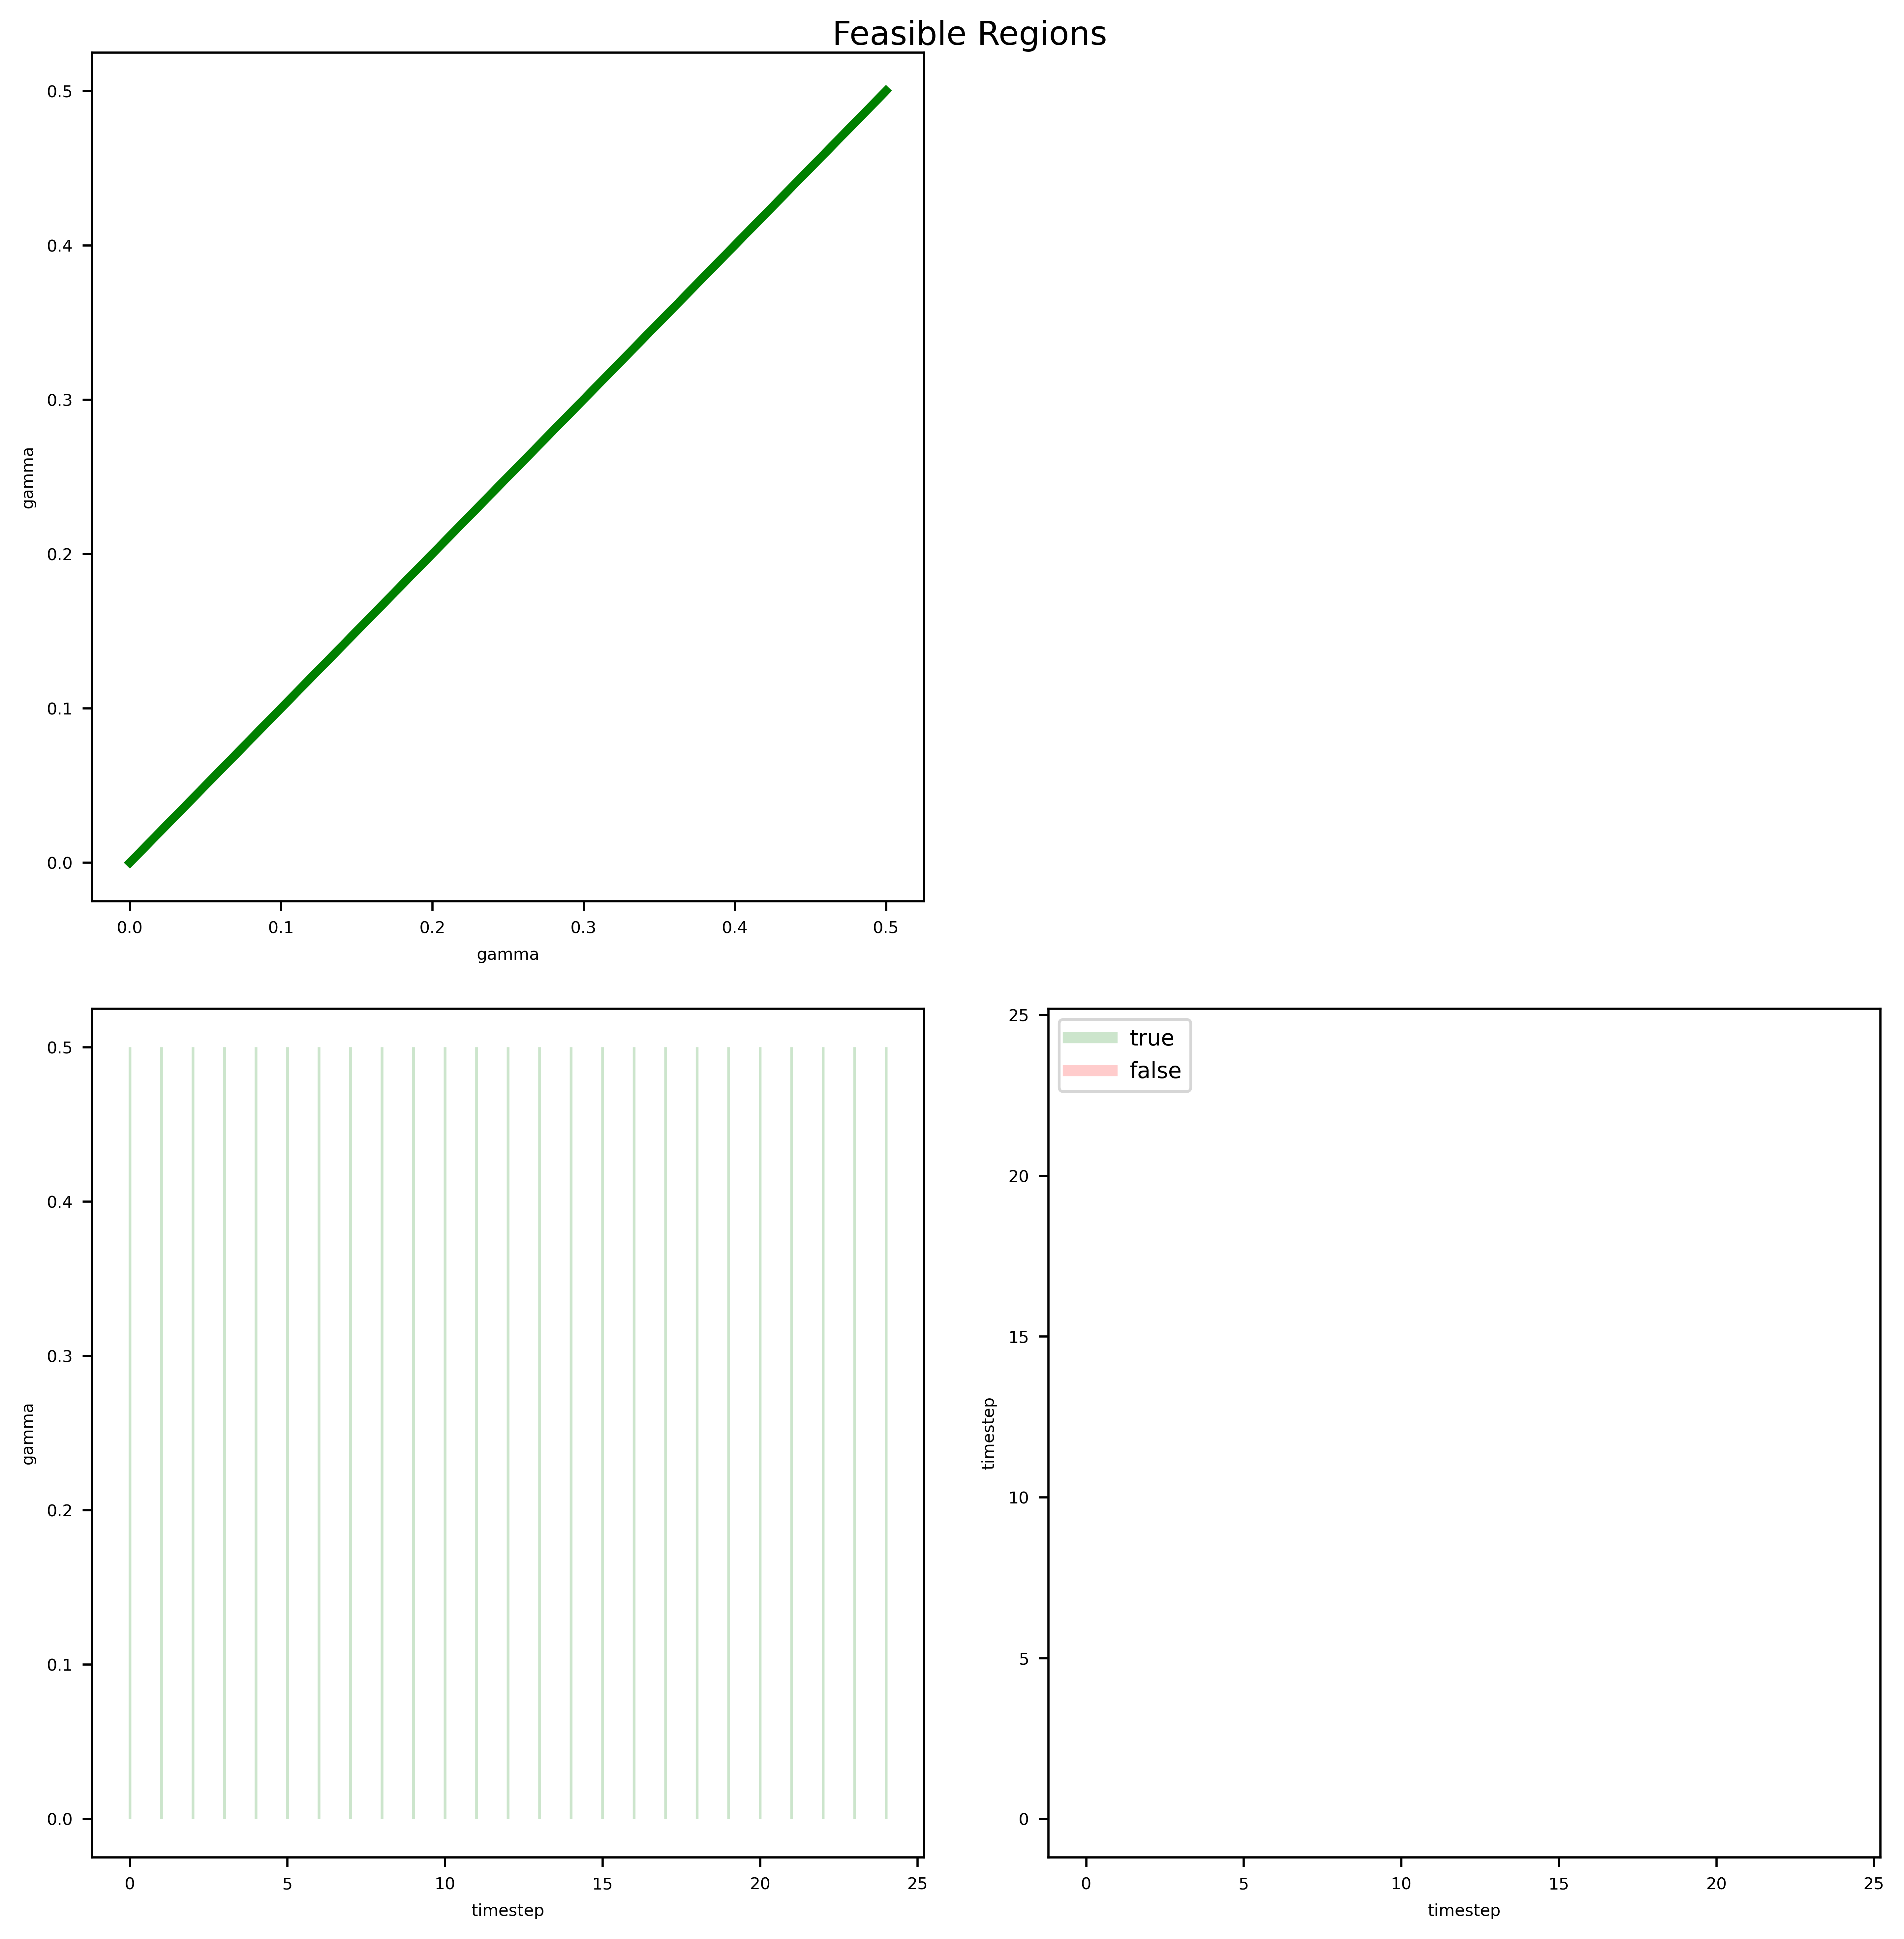

In [4]:
# Use a ten point model with no constraints

num_disc = 20
MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 25, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "gamma",
         "label":"all",
         "interval": {"lb":0, "ub":0.5}}
    ],
    "constraints": [        
        {"name": "pos_h_0",
         "variable": "h_0",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_1",
         "variable": "h_1",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_2",
         "variable": "h_2",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_3",
         "variable": "h_3",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_4",
         "variable": "h_4",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_5",
         "variable": "h_5",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_6",
         "variable": "h_6",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_7",
         "variable": "h_7",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_8",
         "variable": "h_8",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_9",
         "variable": "h_9",
         "interval": {"lb": 0}
        },
                {"name": "pos_h_10",
         "variable": "h_10",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_11",
         "variable": "h_11",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_12",
         "variable": "h_12",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_13",
         "variable": "h_13",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_14",
         "variable": "h_14",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_15",
         "variable": "h_15",
         "interval": {"lb": 0}
         },
        {"name": "pos_h_16",
         "variable": "h_16",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_17",
         "variable": "h_17",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_18",
         "variable": "h_18",
         "interval": {"lb": 0}
        },
        {"name": "pos_h_19",
         "variable": "h_19",
         "interval": {"lb": 0}
        },
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_18", "h_19"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }

        ],
    "config": {
               "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-5,
        "verbosity": 30,
        "dreal_mcts": True,
        "dreal_precision": 1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}
variables = [f"h_{d}" for d in range(num_disc)]
# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["gamma", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=1
)

2023-11-02 19:51:22,577 - funman.server.worker - INFO - FunmanWorker running...
2023-11-02 19:51:22,583 - funman.server.worker - INFO - Starting work on: bd259d64-f8bf-4714-b82c-df42991e7149


2023-11-02 19:51:22,660 - /root/funman/src/funman/search/smt_check.py - DEBUG - Solving schedule: timepoints=[0, 1, 2, 3, 4, 5, 6, 7]
2023-11-02 19:51:22,663 - funman_dreal.solver - DEBUG - Created new Solver ...
2023-11-02 19:51:22,680 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 0 to 1
2023-11-02 19:51:22,858 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 1 to 2
2023-11-02 19:51:22,996 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 2 to 3
2023-11-02 19:51:23,118 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 3 to 4
2023-11-02 19:51:23,201 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 4 to 5
2023-11-02 19:51:23,284 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 5 to 6
2023-11-02 19:51:23,367 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 6 to 7
2023-11-02 19:51:23,896 - /root/funman/src/funman/search/sm

1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
gamma = 0.32624
{}
      assume_non-negative_h_0  assume_non-negative_h_1  \
time                                                     
0.0                       1.0                      1.0   
1.0                       1.0                      1.0   
2.0                       1.0                      1.0   
3.0                       1.0                      1.0   
4.0                       1.0                      1.0   
5.0                       1.0                      1.0   
6.0                       1.0                      1.0   
7.0                       1.0                      1.0   

      assume_non-negative_h_2  assume_non-negative_h_3  \
time                                                     
0.0                       1.0                      1.0   
1.0                       1.0                      1.0   
2.0                       1.0                      1.0   
3.0                       1.0                      1.0   
4.0         

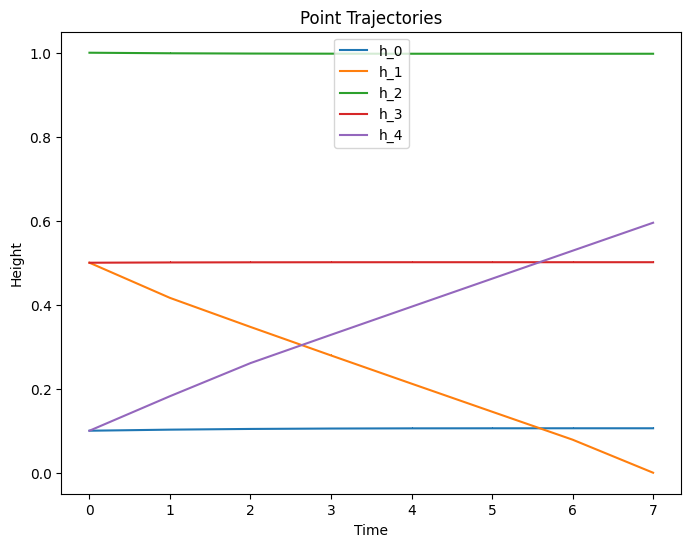

In [9]:
# Use a five point model with no constraints

num_disc = 10
# MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 5, 1)}
            ],
        },
        
    ],
    "constraints": [
        {"name": "non-negative_h_0",
         "variable": "h_0",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
         },
        {"name": "non-negative_h_1",
         "variable": "h_1",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_2",
         "variable": "h_2",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_3",
         "variable": "h_3",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_4",
         "variable": "h_4",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        # {"name": "LHS_slope",
        #     "variables": ["h_1", "h_0"],
        #     "weights": [1, -1],
        #     "additive_bounds": {"lb": 0},
        #     "timepoints": {"lb": 0}
        # }, 
        # {"name": "RHS_slope",
        #     "variables": ["h_3", "h_4"],
        #     "weights": [1, -1],
        #     "additive_bounds": {"lb": 0},
        #     "timepoints": {"lb": 0}
        # }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-1,
        "verbosity": 10,
        "dreal_mcts": True,
        "dreal_precision": 0.1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
)
summarize_results(num_disc, results)




2023-11-02 19:52:46,225 - funman.server.worker - INFO - FunmanWorker running...
2023-11-02 19:52:46,234 - funman.server.worker - INFO - Starting work on: 49fae446-97b0-41b1-ad13-4cf076fdfd49
2023-11-02 19:52:46,339 - /root/funman/src/funman/search/smt_check.py - DEBUG - Solving schedule: timepoints=[0, 1, 2, 3, 4, 5, 6, 7]
2023-11-02 19:52:46,342 - funman_dreal.solver - DEBUG - Created new Solver ...
2023-11-02 19:52:46,365 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 0 to 1
2023-11-02 19:52:46,558 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 1 to 2
2023-11-02 19:52:46,710 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 2 to 3
2023-11-02 19:52:46,846 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 3 to 4
2023-11-02 19:52:46,991 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 4 to 5
2023-11-02 19:52:47,117 - /root/funman/src/funman/translate/petrinet.py - DE

1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
gamma = 0.11339
{}
      assume_non-negative_h_0  assume_non-negative_h_1  \
time                                                     
0.0                       1.0                      1.0   
1.0                       1.0                      1.0   
2.0                       1.0                      1.0   
3.0                       1.0                      1.0   
4.0                       1.0                      1.0   
5.0                       1.0                      1.0   
6.0                       1.0                      1.0   
7.0                       1.0                      1.0   

      assume_non-negative_h_2  assume_non-negative_h_3  \
time                                                     
0.0                       1.0                      1.0   
1.0                       1.0                      1.0   
2.0                       1.0                      1.0   
3.0                       1.0                      1.0   
4.0         

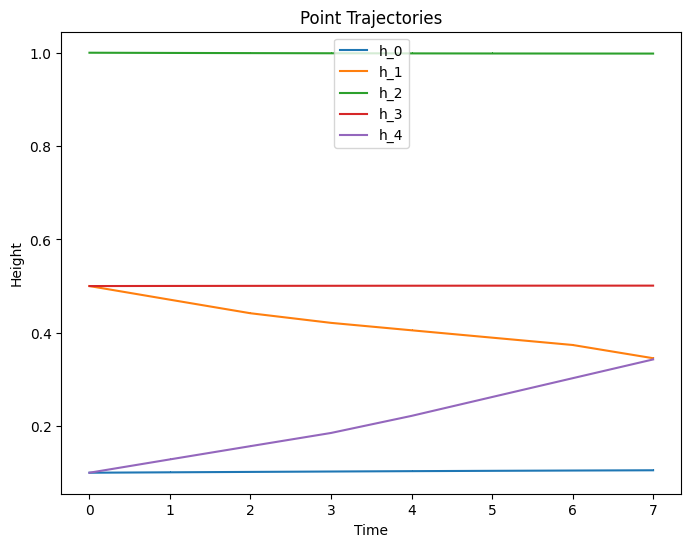

In [10]:
# Use a five point model with no constraints

num_disc = 5
# MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 8, 1)}
            ],
        },
        
    ],
    "constraints": [
        {"name": "non-negative_h_0",
         "variable": "h_0",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
         },
        {"name": "non-negative_h_1",
         "variable": "h_1",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_2",
         "variable": "h_2",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_3",
         "variable": "h_3",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non-negative_h_4",
         "variable": "h_4",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "LHS_slope (h_0 <= h_1)",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope (h_3 >= h_4)",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-1,
        "verbosity": 10,
        "dreal_mcts": True,
        "dreal_precision": 0.1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
)
summarize_results(num_disc, results)




In [3]:
# Use a five point model with no constraints

num_disc = 5
# MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 8, 1)}
            ],
        },
        
    ],
    "constraints": [
        {"name": "non_negative_h_0",
         "variable": "h_0",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
         },
        {"name": "non_negative_h_1",
         "variable": "h_1",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_2",
         "variable": "h_2",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_3",
         "variable": "h_3",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_4",
         "variable": "h_4",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },

        # (h_0 <= h_1)
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        # (h_3 >= h_4)
        {"name": "RHS_slope",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        },


     {"name": "melt_h_2",
         "variable": "h_2",
         "interval": {"lb": 0, "ub": .8},
         "timepoints": {"lb": 5}
        },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-1,
        "verbosity": 10,
        "dreal_mcts": True,
        "dreal_precision": 0.1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
)
summarize_results(num_disc, results)




2023-11-02 19:57:26,405 - /root/funman/src/funman/search/smt_check.py - DEBUG - Solving schedule: timepoints=[0, 1, 2, 3, 4, 5, 6, 7]
2023-11-02 19:57:26,410 - funman_dreal.solver - DEBUG - Created new Solver ...
2023-11-02 19:57:26,436 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 0 to 1
2023-11-02 19:57:27,041 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 1 to 2
2023-11-02 19:57:27,201 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 2 to 3
2023-11-02 19:57:27,366 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 3 to 4
2023-11-02 19:57:27,532 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 4 to 5
2023-11-02 19:57:27,667 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 5 to 6
2023-11-02 19:57:27,777 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 6 to 7
2023-11-02 19:57:28,597 - funman.api.run - INFO - Dumping r

0 Points (+:0, -:0), 1 Boxes (+:0, -:1)
{
    "box": {
        "schedules": {
            "lb": -1.7976931348623157e+308,
            "ub": 1.7976931348623157e+308,
            "closed_upper_bound": false
        },
        "gamma": {
            "lb": 0.0,
            "ub": 1.0,
            "closed_upper_bound": false
        },
        "timestep": {
            "lb": 7.0,
            "ub": 7.0,
            "closed_upper_bound": true
        }
    },
    "relevant_constraints": [
        {
            "soft": true,
            "name": "non_negative_h_0",
            "timepoints": {
                "lb": 0.0,
                "ub": 1.7976931348623157e+308,
                "closed_upper_bound": false
            },
            "variable": "h_0",
            "interval": {
                "lb": 0.0,
                "ub": 1.7976931348623157e+308,
                "closed_upper_bound": false
            }
        },
        {
            "soft": true,
            "name": "non_negative_h_1",
 

In [8]:
# Use a five point model with no constraints

num_disc = 5
# MODEL_PATH = os.path.join("../..", f"halfar_{num_disc}.json")


request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 8, 1)}
            ],
        },
        
    ],
    "constraints": [
        {"name": "non_negative_h_0",
         "variable": "h_0",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
         },
        {"name": "non_negative_h_1",
         "variable": "h_1",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_2",
         "variable": "h_2",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_3",
         "variable": "h_3",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },
        {"name": "non_negative_h_4",
         "variable": "h_4",
         "interval": {"lb": 0},
         "timepoints":{"lb":0}
        },

        # (h_0 <= h_1)
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        # (h_3 >= h_4)
        {"name": "RHS_slope",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        },


     {"name": "melt_h_2",
         "variable": "h_2",
         "interval": {"lb": 0, "ub": 1}
        },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-1,
        "verbosity": 10,
        "dreal_mcts": True,
        "dreal_precision": 0.1,
        # "save_smtlib": "halfar.smt2",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
)
summarize_results(num_disc, results)




2023-11-02 19:59:37,207 - funman.server.worker - INFO - FunmanWorker running...
2023-11-02 19:59:37,215 - funman.server.worker - INFO - Starting work on: 64599ed5-ca1a-4308-8f56-ce379fd54cd4


2023-11-02 19:59:38,109 - /root/funman/src/funman/search/smt_check.py - DEBUG - Solving schedule: timepoints=[0, 1, 2, 3, 4, 5, 6, 7]
2023-11-02 19:59:38,112 - funman_dreal.solver - DEBUG - Created new Solver ...
2023-11-02 19:59:38,124 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 0 to 1
2023-11-02 19:59:38,243 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 1 to 2
2023-11-02 19:59:38,338 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 2 to 3
2023-11-02 19:59:38,424 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 3 to 4
2023-11-02 19:59:38,512 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 4 to 5
2023-11-02 19:59:38,597 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 5 to 6
2023-11-02 19:59:38,670 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 6 to 7
2023-11-02 19:59:39,353 - funman.api.run - INFO - Dumping r

0 Points (+:0, -:0), 1 Boxes (+:0, -:1)
{
    "box": {
        "schedules": {
            "lb": -1.7976931348623157e+308,
            "ub": 1.7976931348623157e+308,
            "closed_upper_bound": false
        },
        "gamma": {
            "lb": 0.0,
            "ub": 1.0,
            "closed_upper_bound": false
        },
        "timestep": {
            "lb": 7.0,
            "ub": 7.0,
            "closed_upper_bound": true
        }
    },
    "relevant_constraints": [
        {
            "soft": true,
            "name": "melt_h_2",
            "timepoints": null,
            "variable": "h_2",
            "interval": {
                "lb": 0.0,
                "ub": 1.0,
                "closed_upper_bound": false
            }
        }
    ],
    "expression": "((((((assume_melt_h_2 & disj1047) & (h_2_0 = 1.0)) & ((conj32 | (! assume_melt_h_2)) | (! disj1047))) & (((h_2_0 < 0.0) | (! (h_2_0 < 1.0))) | (! (h_2_0 = 1.0)))) & ((h_2_0 < 1.0) | (! conj32))) & ((! conj32) 